## SALES ANALYSIS

#### Importing libraries

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### Getting the Data

In [4]:
# Combining data from multiple .csv files into one

files = [file for file in os.listdir("./Sales_Data")]

total_data = pd.DataFrame()

for f in files:
    df = pd.read_csv("./Sales_Data/" + f)
    total_data = pd.concat([total_data, df])

total_data.to_csv("all_data.csv", index = False)

#### Reading the complete data

In [5]:
sales_data = pd.read_csv("all_data.csv")

#### Checking out the data

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
# We have 186850-186305 = 545 null rows 

In [8]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
sales_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [10]:
# The store has 20 different products
# The difference between Order ID count and unique Order ID suggests that 
    # Some orders have more than one item

### Data Cleaning

In [11]:
sales_data[sales_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# dropping all rows having all null values

sales_data.dropna(axis=0, how = 'all', inplace = True)

In [13]:
sales_data['Month'] = sales_data['Order Date'].apply(lambda x : x[0:2])

In [14]:
sales_data['Month'] 

0         04
2         04
3         04
4         04
5         04
          ..
186845    09
186846    09
186847    09
186848    09
186849    09
Name: Month, Length: 186305, dtype: object

In [15]:
sales_data['Month'] = pd.to_numeric(sales_data['Month'])

ValueError: Unable to parse string "Or" at position 517

In [16]:
# dropping rows having Order Date as value in Order Date column

sales_data = sales_data[sales_data['Month'] != "Or"]

In [17]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [18]:
sales_data.drop('Month', axis =1, inplace = True)
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Transforming the data to desired data types

In [19]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [20]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])

In [21]:
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

#### Adding required columns to the data

In [22]:
sales_data['Month'] = sales_data['Order Date'].dt.month

In [23]:
sales_data['Hour'] = sales_data['Order Date'].dt.hour

In [24]:
sales_data['Sales'] = sales_data['Price Each'] * sales_data['Quantity Ordered']

In [25]:
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(", ")[1] + " (" + x.split(", ")[2][0:2] + ")")

In [26]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,379.99,San Francisco (CA)


## Exploratory Data Analysis

#### Business Question 01: Which month had the highest number of sales?

In [27]:
month_sales = sales_data.groupby('Month').sum()

In [28]:
month_sales.reset_index(inplace = True)
month_sales

,Month,Quantity Ordered,Price Each,Hour,Sales
0,1,10903,1.811768e+06,139485,1.822257e+06
1,2,13449,2.188885e+06,172669,2.202022e+06
2,3,17005,2.791208e+06,218969,2.807100e+06
3,4,20558,3.367671e+06,262259,3.390670e+06
4,5,18667,3.135125e+06,238780,3.152607e+06
5,6,15253,2.562026e+06,195528,2.577802e+06
6,7,16072,2.632540e+06,206169,2.647776e+06
7,8,13448,2.230345e+06,172289,2.244468e+06
8,9,13109,2.084992e+06,168513,2.097560e+06
9,10,22703,3.715555e+06,290650,3.736727e+06


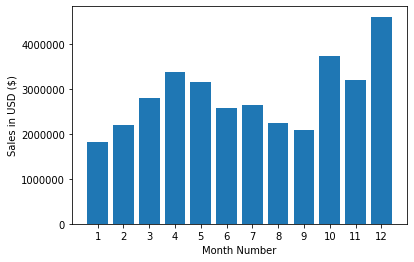

In [29]:
plt.bar(month_sales['Month'], month_sales['Sales'])
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.xticks(month_sales['Month'])
plt.show()

In [30]:
# From the graph it is clear that December had the highest number of Sales.
# This may be due to the fact that christmas is in December and people tend to buy more

#### Business Question 02: Which city sold the most product

In [31]:
city_data = sales_data.groupby('City').sum()

In [32]:
city_data.reset_index(inplace = True)

In [33]:
city_data

,City,Quantity Ordered,Price Each,Month,Hour,Sales
0,Atlanta (GA),16602,2.779908e+06,104794,214264,2.795499e+06
1,Austin (TX),11153,1.809874e+06,69829,141946,1.819582e+06
2,Boston (MA),22528,3.637410e+06,141112,288225,3.661642e+06
3,Dallas (TX),16730,2.752628e+06,104620,214390,2.767975e+06
4,Los Angeles (CA),33289,5.421435e+06,208325,427444,5.452571e+06
5,New York City (NY),27932,4.635371e+06,175741,357696,4.664317e+06
6,Portland (ME),2750,4.471893e+05,17144,35211,4.497583e+05
7,Portland (OR),11303,1.860558e+06,70621,144421,1.870732e+06
8,San Francisco (CA),50239,8.211462e+06,315520,643265,8.262204e+06
9,Seattle (WA),16553,2.733296e+06,104941,213292,2.747755e+06


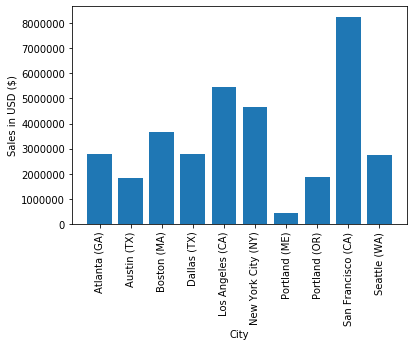

In [34]:
plt.bar(city_data['City'], city_data['Sales'])
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.xticks(city_data['City'], rotation = 'vertical')
plt.show()

In [35]:
# San Francisco has the highest number of sales

#### Business Question 03: At what time should we display advertisements to maximize the customer likehood of buying the product

In [36]:
time_data = sales_data.groupby('Hour').count()
time_data.reset_index(inplace= True)
time_data

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748


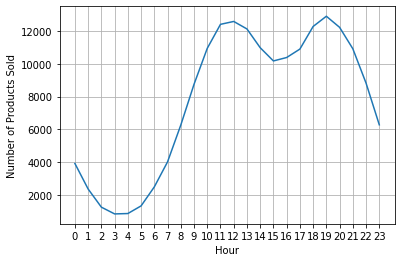

In [37]:
plt.plot(time_data['Hour'], time_data['Sales'])
plt.xlabel('Hour')
plt.ylabel('Number of Products Sold')
plt.xticks(time_data['Hour'])
plt.grid()
plt.show()

In [38]:
# Customers are more likely to buy from 11AM-12PM and 06PM-07PM
# Recommendation: Advertisements should be shown slightly before 11AM and 06PM

#### Business Question 04: What products are most often sold together?

In [57]:
# Extracting order id having multiple items

items_dup = sales_data[sales_data['Order ID'].duplicated(keep = False)]

In [58]:
# Grouping products with the same order ID together 

items_dup['Grouped'] = items_dup.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))

C:\Users\shiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
items_dup.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Sales,City,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles (CA),"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles (CA),"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,600.00,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,11.95,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,11,99.99,Boston (MA),"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [60]:
# Removing duplicates having same order ID and Grouping

items_dup2 = items_dup[['Order ID', 'Grouped']].drop_duplicates()

In [62]:
items_dup2.head(5)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [63]:
from itertools import combinations
from collections import Counter

In [96]:
# Calculating 10 products most commonly sold together

count = Counter()

for row in items_dup2['Grouped']:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
values = []

for index,value in count.most_common(10):
    values.append((index, value))

In [97]:
values

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [98]:
items = [value[0] for value in values]
items

[('iPhone', 'Lightning Charging Cable'),
 ('Google Phone', 'USB-C Charging Cable'),
 ('iPhone', 'Wired Headphones'),
 ('Google Phone', 'Wired Headphones'),
 ('Vareebadd Phone', 'USB-C Charging Cable'),
 ('iPhone', 'Apple Airpods Headphones'),
 ('Google Phone', 'Bose SoundSport Headphones'),
 ('USB-C Charging Cable', 'Wired Headphones'),
 ('Vareebadd Phone', 'Wired Headphones'),
 ('Lightning Charging Cable', 'Wired Headphones')]

In [99]:
item = [", ".join(value) for value in items]

In [100]:
item

['iPhone, Lightning Charging Cable',
 'Google Phone, USB-C Charging Cable',
 'iPhone, Wired Headphones',
 'Google Phone, Wired Headphones',
 'Vareebadd Phone, USB-C Charging Cable',
 'iPhone, Apple Airpods Headphones',
 'Google Phone, Bose SoundSport Headphones',
 'USB-C Charging Cable, Wired Headphones',
 'Vareebadd Phone, Wired Headphones',
 'Lightning Charging Cable, Wired Headphones']

In [101]:
qty =[value[1] for value in values]
qty

[1005, 987, 447, 414, 361, 360, 220, 160, 143, 92]

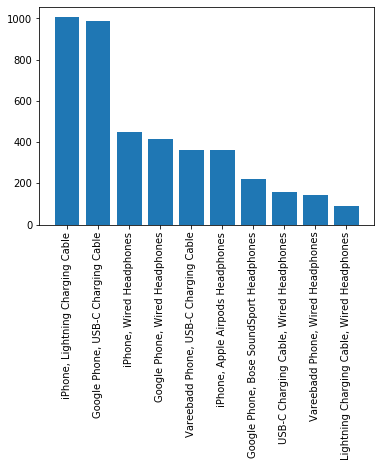

In [102]:
plt.bar(item, qty)
plt.xticks(item, rotation='vertical')
plt.show()

In [ ]:
# iPhone and lightning charging cables are most often sold together
# The company can use these top 10 results to provide better offers to customers

#### Business Question 05: Which product sold the most and why?

In [105]:
product_sales = sales_data.groupby('Product').sum()

In [106]:
product_sales.reset_index(inplace=True)

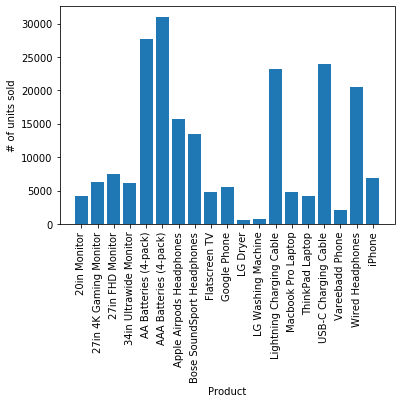

In [107]:
plt.bar(product_sales['Product'], product_sales['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('# of units sold')
plt.xticks(product_sales['Product'], rotation = 'vertical')
plt.show()

In [108]:
avg_price = sales_data.groupby('Product').mean()['Price Each']

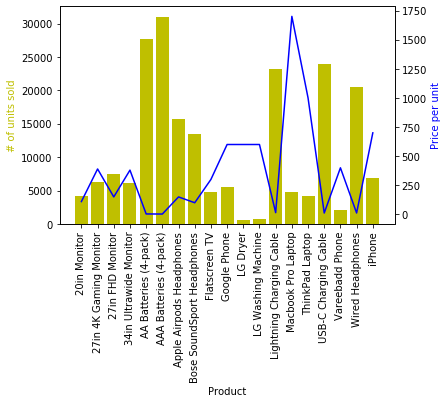

In [112]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_sales['Product'], product_sales['Quantity Ordered'], color = 'y')
ax2.plot(product_sales['Product'], avg_price, color = 'b')
ax1.set_xlabel('Product')
ax1.set_ylabel('# of units sold', color = 'y')
ax2.set_ylabel('Price per unit', color = 'b')
ax1.set_xticklabels(product_sales['Product'], rotation = 'vertical')
plt.show()

In [ ]:
# AAA & AA batteries sold the most.
# Plot shows that in general lower priced products sold more than higher priced products.
